In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from nltk import word_tokenize

In [2]:
tqdm.pandas()

/u/jai/miniconda3/envs/venv37/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
df = pd.read_csv("community_posting_statistics.csv").sort_values(by="body")

In [10]:
cutoffs = [1, 10, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
com_counts = []
for cutoff in cutoffs:
    num_communities = df[df['body'] >= cutoff].shape[0]
    com_counts.append(num_communities)

Text(0.5, 1.0, 'Number of communities with at least n stance marker posts')

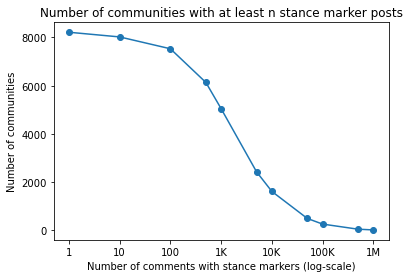

In [18]:
plt.plot(np.log10(cutoffs), com_counts, marker='o')
plt.xticks([0, 1, 2, 3, 4, 5, 6], labels = ["1", "10", "100", "1K", "10K", "100K", "1M"])
plt.xlabel("Number of comments with stance markers (log-scale)")
plt.ylabel("Number of communities")
plt.title("Number of communities with at least n stance marker posts")

Text(0.5, 1.0, 'Number of communities with at least n stance marker posts')

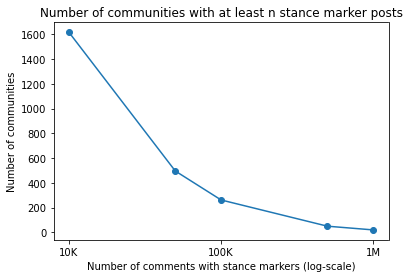

In [17]:
plt.plot(np.log10(cutoffs[-5:]), com_counts[-5:], marker='o')
plt.xticks([4, 5, 6], labels = ["10K", "100K", "1M"])
plt.xlabel("Number of comments with stance markers")
plt.ylabel("Number of communities")
plt.title("Number of communities with at least n stance marker posts")

In [19]:
val = pd.read_csv("temporary_valence_comparison.csv")
val

,Unnamed: 0,body,subreddit,len
0,0,I just unsubbed. No point hanging out here.,darksouls,10
1,1,God needed both angels and men to fulfill His ...,Christianity,44
2,2,You did a good job explaining your thoughts to...,WildStar,241
3,3,"Well as of right now, your team is pretty soli...",bravefrontier,93
4,4,Wifi or wired LAN shouldn't make a difference ...,androidapps,92
...,...,...,...,...
499995,499995,I'm saying that a vibrant and healthy ecosyste...,todayilearned,89
499996,499996,I'm gonna be a bit of a devils advocate... But...,vegetarian,66
499997,499997,You didn't see the living conditions did you.,worldnews,10
499998,499998,"Like it is in life, a lot of people here are l...",AskMen,28


In [6]:
ROOT_DIR = "/ais/hal9000/datasets/reddit/stance_analysis/"
files = list(os.walk(ROOT_DIR))

In [27]:
tmp = df[['body', 'subreddit']]
tmp['len'] = tmp['body'].progress_apply(lambda x: len(word_tokenize(x)))

100%|██████████| 500000/500000 [04:10<00:00, 1994.78it/s]
/u/jai/miniconda3/envs/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
tmp.to_csv("temporary_valence_comparison.csv")

In [52]:
x = tmp[['body', 'subreddit']].groupby("subreddit").count()
x.add(x, fill_value=0)

,body
subreddit,
100pushups,4
1022,4
1200isplenty,10
1911,32
195,32
...,...
zelda,128
zen,172
zombies,40


In [51]:
 + tmp[['body', 'subreddit']].groupby("subreddit").count()

,body
subreddit,
100pushups,4
1022,4
1200isplenty,10
1911,32
195,32
...,...
zelda,128
zen,172
zombies,40


In [56]:
total = None
for dir_tup in files:
    dir = dir_tup[0]
    if not dir.endswith("files"):
        continue
    sub_files = sorted(dir_tup[2])
    for sub_file in tqdm(sub_files[:3]):
        print(dir + "/" + sub_file)
        df = pd.read_json(dir + "/" + sub_file, lines=True)
        tmp = df[df['BF'] == 1][['body', 'subreddit']]
        agg = tmp.groupby("subreddit").count()
        if total is None:
            total = agg
        else:
            total = total.add(agg, fill_value=0)
    break



  0%|          | 0/3 [00:00<?, ?it/s]

/ais/hal9000/datasets/reddit/stance_analysis/2014_04_files/aa


 33%|███▎      | 1/3 [00:10<00:21, 10.99s/it]

/ais/hal9000/datasets/reddit/stance_analysis/2014_04_files/ab


 67%|██████▋   | 2/3 [00:21<00:10, 10.79s/it]

/ais/hal9000/datasets/reddit/stance_analysis/2014_04_files/ac


100%|██████████| 3/3 [00:32<00:00, 10.84s/it]


In [59]:
total

,body
subreddit,
100pushups,2.0
1022,20.0
1200isplenty,27.0
1911,34.0
195,8.0
...,...
zelda,341.0
zen,461.0
zerocarb,3.0
